In [219]:
# Load packages

#pip install missingno
import pandas as pd
import re
import missingno as msno 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load data

data = pd.read_csv('Newegg.csv')
data.head()

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,screen_curvature,video_inputs
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,NaN,NaN
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,NaN,"HDMI (1.4), DisplayPort Video Inputs"
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,NaN,"2 x HDMI, VGA, DisplayPort Video Inputs"
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,NaN,NaN
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,NaN,"3 x HDMI, DisplayPort Video Inputs"


In [5]:
# Try to extract the refresh rate from the product name

test_product = data['product_name'][0]
test_product

'BenQ GL2780 27" Full HD 1920 x 1080 75Hz 1ms VGA DVI HDMI DisplayPort Built-in Speakers Flicker-Free Technology LED Backlit LCD Monitor'

In [6]:
#Some of the refresh rates are in the product names
#This function finds the refresh rates

def refresh_rate(name):
    try:
        a = int(re.findall(pattern = '[0-9]+ ?Hz', string = name)[0].replace('Hz',''))
    except:
        return None
    return a 

In [7]:
refresh_rate(test_product)

75

In [8]:
#Create new refresh rate column

data = data.assign(refresh_rate2 = list(map(refresh_rate, data['product_name'])))
data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,screen_curvature,video_inputs,refresh_rate2
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,NaN,NaN,75.0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,NaN,"HDMI (1.4), DisplayPort Video Inputs",144.0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,NaN,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,NaN,NaN,60.0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,NaN,"3 x HDMI, DisplayPort Video Inputs",144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,NaN,"DisplayPort, HDMI, VGA Video Inputs",75.0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Create a function to find the response time in the product name

def response_time(name):
    try:
        a = int(re.findall(pattern = '[0-9]+ ?ms', string = name)[0].replace('ms',''))
    except: 
        return None
    return a

In [10]:
#Create a new response time column

data = data.assign(response_time2 = list(map(response_time, data['product_name'])))
data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,screen_curvature,video_inputs,refresh_rate2,response_time2
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,NaN,NaN,75.0,1.0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,NaN,"HDMI (1.4), DisplayPort Video Inputs",144.0,1.0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,NaN,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0,1.0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,NaN,NaN,60.0,1.0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,NaN,"3 x HDMI, DisplayPort Video Inputs",144.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,5.0
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,NaN,"DisplayPort, HDMI, VGA Video Inputs",75.0,4.0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [11]:
# Create a function to find the resolution in the product name

def resolution(name):
    try:
        a = re.findall(pattern = '[0-9]+ ?x ?[0-9]+', string = name)
    except: 
        a = None
    return a

In [12]:
resolution(test_product)

['1920 x 1080']

In [13]:
# Create a new resolution column 

data = data.assign(resolution2 = list(map(resolution, data['product_name'])))
data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,screen_curvature,video_inputs,refresh_rate2,response_time2,resolution2
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,NaN,NaN,75.0,1.0,[1920 x 1080]
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,NaN,"HDMI (1.4), DisplayPort Video Inputs",144.0,1.0,[2560 x 1440]
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,NaN,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0,1.0,[1920 x 1080]
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,NaN,NaN,60.0,1.0,[1920 x 1080]
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,NaN,"3 x HDMI, DisplayPort Video Inputs",144.0,4.0,[2560 x 1440]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,5.0,[]
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,NaN,"DisplayPort, HDMI, VGA Video Inputs",75.0,4.0,[2560x1440]
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,[2560 x 1440]
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,[2560 x 1440]


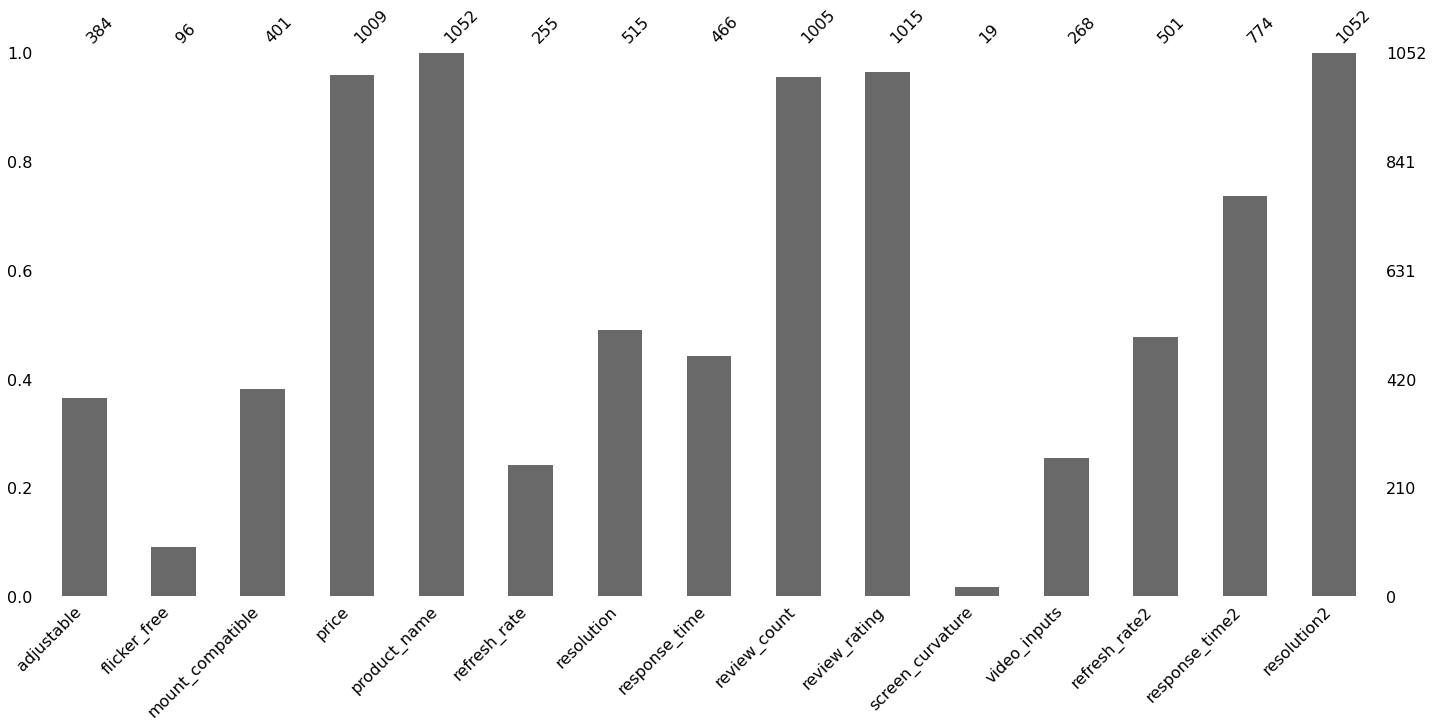

In [14]:
# Visualize missing data

msno.bar(data) 

In [15]:
#Find percentage where both columns have equal entries
np.mean(data.response_time == data.response_time2)

0.0

In [16]:
#df = data.copy()
#df
#Bool =  (df.response_time != df.response_time2) and reponse_time
#df.loc[(df.response_time != df.response_time2) and response_time = None, 'response_time'] = df.response_time2[(df.response_time != df.response_time2) and repo]

In [19]:
# So far, I have updated the response_time, refresh_rate, resolution
#Now I need to change several columns to 0 or 1
#First adjustable

def empty_or_nah(name):
    return list(map(lambda x: 0 if pd.isna(x) else 1, name))

data = data.assign(adjustable2 = empty_or_nah(data['adjustable']))
data = data.assign(flicker_free22 = empty_or_nah(data['flicker_free']))
data = data.assign(mount_compatible2 = empty_or_nah(data['mount_compatible']))
data = data.assign(screen_curvature2 = empty_or_nah(data['screen_curvature']))

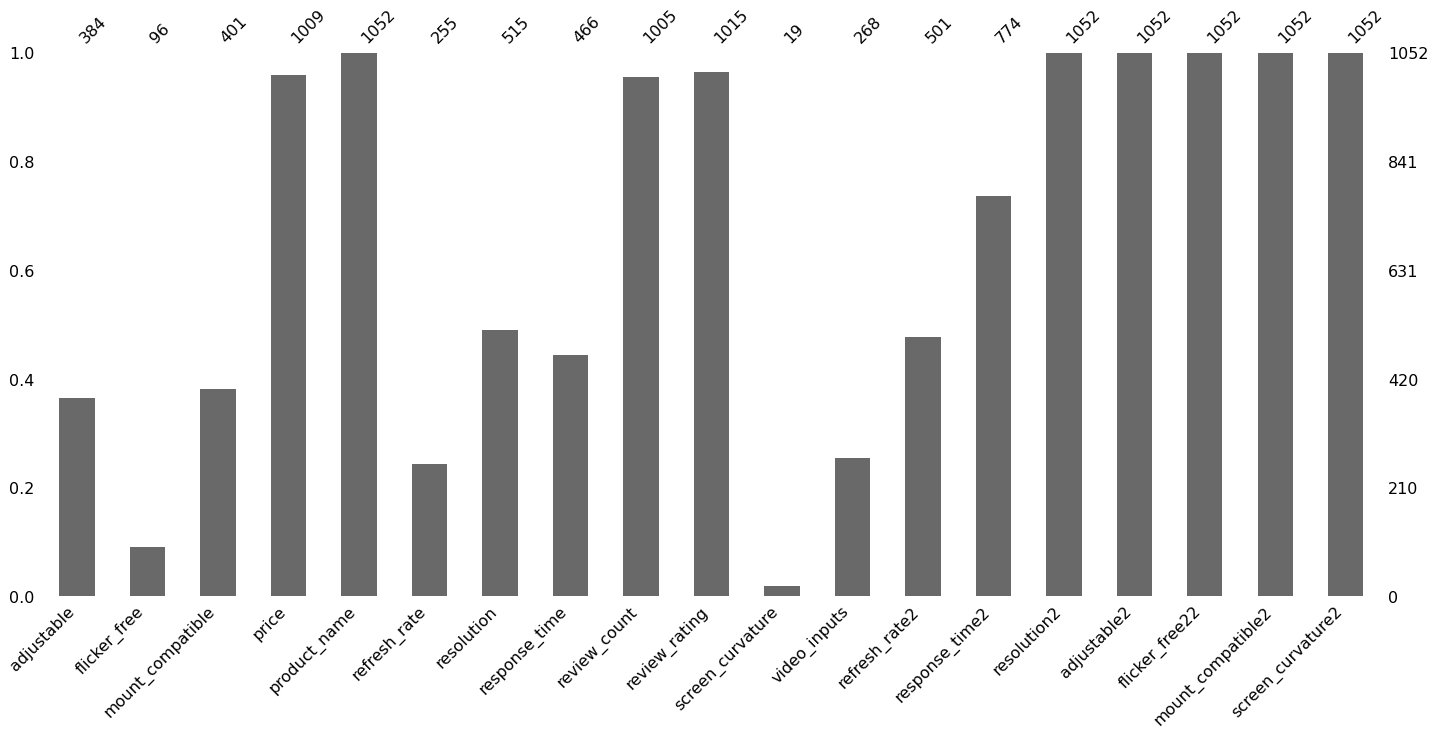

In [20]:
#Visualize missing data

msno.bar(data) 

In [21]:
# Check if boolean columns match number opf entries in original columns
print(sum(data['screen_curvature2']))
print(sum(data['adjustable2']))
print(sum(data['mount_compatible2']))
print(sum(data['flicker_free22']))

19
384
401
96


In [22]:
#View data frame

data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,screen_curvature,video_inputs,refresh_rate2,response_time2,resolution2,adjustable2,flicker_free22,mount_compatible2,screen_curvature2
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,NaN,NaN,75.0,1.0,[1920 x 1080],1,1,1,0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,NaN,"HDMI (1.4), DisplayPort Video Inputs",144.0,1.0,[2560 x 1440],1,0,1,0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,NaN,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0,1.0,[1920 x 1080],1,0,1,0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,NaN,NaN,60.0,1.0,[1920 x 1080],1,1,1,0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,NaN,"3 x HDMI, DisplayPort Video Inputs",144.0,4.0,[2560 x 1440],1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,5.0,[],0,0,0,0
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,NaN,"DisplayPort, HDMI, VGA Video Inputs",75.0,4.0,[2560x1440],1,0,1,0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,[2560 x 1440],1,0,0,0
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,[2560 x 1440],1,0,0,0


In [23]:
#refresh_rate2 does not have all of the refresh rates
#this function will find all of the refresh rates from the original refresh
#rate column and put in the integer value
# Do trhe same for response time

def missing_refresh_rate(name):
    try:
        a = int(re.search(pattern = '\d{2,3}', string = name)[0])
    except: 
        return None
    return a

In [24]:
#Create a new column for refresh rate that finds the numbner in the original refresh rate column
data = data.assign(refresh_rate_missing = list(map(missing_refresh_rate, data['refresh_rate'])))

In [25]:
#Find the number in the original response time column

def missing_response_time(name):
    try:
        a = int(re.search(pattern = '\d{1}', string = name)[0])
    except: 
        return None
    return a

In [26]:
#Create new response time column that extracts the number from the original response time column

data = data.assign(response_time_missing = list(map(missing_response_time, data['response_time'])))

In [27]:
#View the data

data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,...,video_inputs,refresh_rate2,response_time2,resolution2,adjustable2,flicker_free22,mount_compatible2,screen_curvature2,refresh_rate_missing,response_time_missing
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,...,NaN,75.0,1.0,[1920 x 1080],1,1,1,0,75.0,1.0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,...,"HDMI (1.4), DisplayPort Video Inputs",144.0,1.0,[2560 x 1440],1,0,1,0,144.0,5.0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,...,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0,1.0,[1920 x 1080],1,0,1,0,75.0,1.0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,...,NaN,60.0,1.0,[1920 x 1080],1,1,1,0,NaN,1.0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,...,"3 x HDMI, DisplayPort Video Inputs",144.0,4.0,[2560 x 1440],1,0,1,0,144.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,5.0,[],0,0,0,0,NaN,NaN
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,...,"DisplayPort, HDMI, VGA Video Inputs",75.0,4.0,[2560x1440],1,0,1,0,75.0,4.0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,[2560 x 1440],1,0,0,0,NaN,NaN
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,[2560 x 1440],1,0,0,0,NaN,NaN


In [28]:
#percent of data shared by both columns
np.mean(data.refresh_rate2 == data.refresh_rate_missing)

0.21577946768060838

In [29]:
#percent of data shared by both columns
np.mean(data.response_time2 == data.response_time_missing)

0.33935361216730037

In [30]:
#Change NaN to 0 but leave other entries. This will help me to create
# final refresh rate and response time column with all data included

def nan_to_0(name):
    return list(map(lambda x: 0 if pd.isna(x) else x, name))    

In [31]:
# Create a copy of the dataframe

df = data.copy()
df

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,...,video_inputs,refresh_rate2,response_time2,resolution2,adjustable2,flicker_free22,mount_compatible2,screen_curvature2,refresh_rate_missing,response_time_missing
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,...,NaN,75.0,1.0,[1920 x 1080],1,1,1,0,75.0,1.0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,...,"HDMI (1.4), DisplayPort Video Inputs",144.0,1.0,[2560 x 1440],1,0,1,0,144.0,5.0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,...,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0,1.0,[1920 x 1080],1,0,1,0,75.0,1.0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,...,NaN,60.0,1.0,[1920 x 1080],1,1,1,0,NaN,1.0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,...,"3 x HDMI, DisplayPort Video Inputs",144.0,4.0,[2560 x 1440],1,0,1,0,144.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,5.0,[],0,0,0,0,NaN,NaN
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,...,"DisplayPort, HDMI, VGA Video Inputs",75.0,4.0,[2560x1440],1,0,1,0,75.0,4.0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,[2560 x 1440],1,0,0,0,NaN,NaN
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,[2560 x 1440],1,0,0,0,NaN,NaN


In [32]:
#Convert the missing data to 0 so that I can combine columns 

data.refresh_rate2 = nan_to_0(data.refresh_rate2)
data.refresh_rate_missing = nan_to_0(data.refresh_rate_missing)
data.response_time2 = nan_to_0(data.response_time2)
data.response_time_missing = nan_to_0(data.response_time_missing)

In [33]:
#Check to see if there is anymore missing data

print(sum(pd.isna(data.refresh_rate2)))
print(sum(pd.isna(data.response_time2)))
print(sum(pd.isna(data.refresh_rate_missing)))
print(sum(pd.isna(data.response_time_missing)))

0
0
0
0


In [34]:
#View the dataframe

data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,...,video_inputs,refresh_rate2,response_time2,resolution2,adjustable2,flicker_free22,mount_compatible2,screen_curvature2,refresh_rate_missing,response_time_missing
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,...,NaN,75.0,1.0,[1920 x 1080],1,1,1,0,75.0,1.0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,...,"HDMI (1.4), DisplayPort Video Inputs",144.0,1.0,[2560 x 1440],1,0,1,0,144.0,5.0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,...,"2 x HDMI, VGA, DisplayPort Video Inputs",75.0,1.0,[1920 x 1080],1,0,1,0,75.0,1.0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,...,NaN,60.0,1.0,[1920 x 1080],1,1,1,0,0.0,1.0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,...,"3 x HDMI, DisplayPort Video Inputs",144.0,4.0,[2560 x 1440],1,0,1,0,144.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,5.0,[],0,0,0,0,0.0,0.0
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,...,"DisplayPort, HDMI, VGA Video Inputs",75.0,4.0,[2560x1440],1,0,1,0,75.0,4.0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,4.0,[2560 x 1440],1,0,0,0,0.0,0.0
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,5.0,[2560 x 1440],1,0,0,0,0.0,0.0


In [35]:
#percent of data shared by both columns
print(np.mean(data.response_time2 == data.response_time_missing))
print(np.mean(data.refresh_rate2 == data.refresh_rate_missing))

0.529467680608365
0.7271863117870723


In [36]:
#Create one final Refresh rtae column

Refresh_Rate = list(map(lambda x,y: max(x,y), data.refresh_rate2, data.refresh_rate_missing))
data = data.assign(Refresh_Rate = Refresh_Rate)

In [37]:
#Create a final response time column

Response_Time = list(map(lambda x,y: max(x,y), data.response_time2, data.response_time_missing))
data = data.assign(Response_Time = Response_Time)

In [38]:
#View the data

data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,...,response_time2,resolution2,adjustable2,flicker_free22,mount_compatible2,screen_curvature2,refresh_rate_missing,response_time_missing,Refresh_Rate,Response_Time
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,...,1.0,[1920 x 1080],1,1,1,0,75.0,1.0,75.0,1.0
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,...,1.0,[2560 x 1440],1,0,1,0,144.0,5.0,144.0,5.0
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,...,1.0,[1920 x 1080],1,0,1,0,75.0,1.0,75.0,1.0
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,...,1.0,[1920 x 1080],1,1,1,0,0.0,1.0,60.0,1.0
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,...,4.0,[2560 x 1440],1,0,1,0,144.0,4.0,144.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,...,5.0,[],0,0,0,0,0.0,0.0,0.0,5.0
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,...,4.0,[2560x1440],1,0,1,0,75.0,4.0,75.0,4.0
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,...,4.0,[2560 x 1440],1,0,0,0,0.0,0.0,0.0,4.0
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,...,5.0,[2560 x 1440],1,0,0,0,0.0,0.0,0.0,5.0


In [197]:
#Calculate the number of pixels from the resolution

def num_pixels(name):
    try: 
        return list(map(lambda x: np.prod(x), name))
    except:
        return name

In [145]:
#turn the dimensions of the resolution to an integer

def orig_res(name):
    try:
        a = ",".join(re.findall(pattern='(\d{3,4})[^\d]*(\d{3,4})', string = name)[0])
        a = a.split(',')
        a = list(map(int, a))
    except:
        return name
    return a

In [146]:
#See if the function works as intended

test1 = orig_res(data.resolution[45])
test1

[1920, 1080]

In [147]:
#See if the dimensions are integers as intended

type(test1[0])

int

In [148]:
#Convert the resolution column to dimensions of integers

resolution_missing = list(map(orig_res, data['resolution']))
data = data.assign(resolution_missing = resolution_missing)

In [149]:
#See how many NA in the resolution column

print(sum(pd.isna(data.resolution)))


537


In [150]:
#View the data

data

,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,...,resolution2,adjustable2,flicker_free22,mount_compatible2,screen_curvature2,refresh_rate_missing,response_time_missing,Refresh_Rate,Response_Time,resolution_missing
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,...,[1920 x 1080],1,1,1,0,75.0,1.0,75.0,1.0,"[1920, 1080]"
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,...,[2560 x 1440],1,0,1,0,144.0,5.0,144.0,5.0,"[2560, 1440]"
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,...,[1920 x 1080],1,0,1,0,75.0,1.0,75.0,1.0,"[1920, 1080]"
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,...,[1920 x 1080],1,1,1,0,0.0,1.0,60.0,1.0,"[1920, 1080]"
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,...,[2560 x 1440],1,0,1,0,144.0,4.0,144.0,4.0,"[2560, 1440]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,...,[],0,0,0,0,0.0,0.0,0.0,5.0,NaN
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,...,[2560x1440],1,0,1,0,75.0,4.0,75.0,4.0,"[2560, 1440]"
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,...,[2560 x 1440],1,0,0,0,0.0,0.0,0.0,4.0,NaN
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,...,[2560 x 1440],1,0,0,0,0.0,0.0,0.0,5.0,NaN


In [142]:
#See if the function did its job

data.resolution_missing[:10]

0    [1920, 1080]
1    [2560, 1440]
2    [1920, 1080]
3    [1920, 1080]
4    [2560, 1440]
5    [1920, 1080]
6    [1920, 1080]
7             NaN
8             NaN
9    [1920, 1080]
Name: resolution_missing, dtype: object

In [182]:
#nan_to_0 doesn't work on lists so I need a new function to do the job for the resolutions
def empty_to_zero(name):
    try:
        a = [i if i else 0 for i in name]
    except:
        return 0
    return a

In [ ]:
#See how many different resolutions there are in the data

np.unique(num_pixels(data.resolution_missing))

In [210]:
#Create a new resolution column that contians the number of pixels

resolution_missing = list(map(num_pixels, data['resolution_missing']))
data.assign(resolution_mising = num_pixels(resolution_missing))


,adjustable,flicker_free,mount_compatible,price,product_name,refresh_rate,resolution,response_time,review_count,review_rating,...,flicker_free22,mount_compatible2,screen_curvature2,refresh_rate_missing,response_time_missing,Refresh_Rate,Response_Time,resolution_missing,resolution_num_pixels,resolution_mising
0,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,149.99,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,137.0,4.0,...,1,1,0,75.0,1.0,75.0,1.0,"[1920, 1080]","[1920, 1080]","[1920, 1080]"
1,"Height, Pivot, Swivel, Tilt Adjustable",NaN,VESA Mount Compatible,599.99,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",144Hz Refresh Rate,2560 x 1440 Quad HD 2K Resolution,5ms (GTG) / 1ms (GTG W/OD) Response Time,16.0,5.0,...,0,1,0,144.0,5.0,144.0,5.0,"[2560, 1440]","[2560, 1440]","[2560, 1440]"
2,"Tilt, Swivel, Pivot, Height Adjustable",NaN,VESA Mount Compatible,199.99,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",75Hz Refresh Rate,1920 x 1080 Full HD Resolution,1ms Response Time,16.0,5.0,...,0,1,0,75.0,1.0,75.0,1.0,"[1920, 1080]","[1920, 1080]","[1920, 1080]"
3,Tilt Adjustable,Flicker-Free Technology,VESA Mount Compatible,119.99,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",NaN,1920 x 1080 Full HD Resolution,1ms Response Time,19.0,5.0,...,1,1,0,0.0,1.0,60.0,1.0,"[1920, 1080]","[1920, 1080]","[1920, 1080]"
4,Tilt Adjustable,NaN,VESA Mount Compatible,349.99,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",144Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms (GTG) Response Time,39.0,4.0,...,0,1,0,144.0,4.0,144.0,4.0,"[2560, 1440]","[2560, 1440]","[2560, 1440]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,NaN,NaN,182.93,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",NaN,NaN,NaN,1.0,1.0,...,0,0,0,0.0,0.0,0.0,5.0,NaN,NaN,NaN
1048,"Tilt, Swivel, Height Adjustable",NaN,VESA Mount Compatible,229.99,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",75Hz Refresh Rate,2560 x 1440 WQHD 2K Resolution,4ms Response Time,3.0,4.0,...,0,1,0,75.0,4.0,75.0,4.0,"[2560, 1440]","[2560, 1440]","[2560, 1440]"
1049,"Tilt, Swivel, Pivot, Height Adjustable\r",NaN,NaN,703.99,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.0,0.0,0.0,4.0,NaN,NaN,NaN
1050,"Tilt, Swivel, Pivot, Height Adjustable",NaN,NaN,618.99,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",NaN,NaN,NaN,NaN,NaN,...,0,0,0,0.0,0.0,0.0,5.0,NaN,NaN,NaN


In [255]:
#Subset the most relevant columns for data analysis

draft_data = data[['product_name', 'price', 'review_count', 'review_rating', 'resolution_missing', 
                   'Refresh_Rate', 'Response_Time', 'flicker_free22', 'screen_curvature2', 'mount_compatible2', 'adjustable2']]
draft_data

,product_name,price,review_count,review_rating,resolution_missing,Refresh_Rate,Response_Time,flicker_free22,screen_curvature2,mount_compatible2,adjustable2
0,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",149.99,137.0,4.0,"[1920, 1080]",75.0,1.0,1,0,1,1
1,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",599.99,16.0,5.0,"[2560, 1440]",144.0,5.0,0,0,1,1
2,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",199.99,16.0,5.0,"[1920, 1080]",75.0,1.0,0,0,1,1
3,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",119.99,19.0,5.0,"[1920, 1080]",60.0,1.0,1,0,1,1
4,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",349.99,39.0,4.0,"[2560, 1440]",144.0,4.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1047,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",182.93,1.0,1.0,NaN,0.0,5.0,0,0,0,0
1048,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",229.99,3.0,4.0,"[2560, 1440]",75.0,4.0,0,0,1,1
1049,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",703.99,NaN,NaN,NaN,0.0,4.0,0,0,0,1
1050,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",618.99,NaN,NaN,NaN,0.0,5.0,0,0,0,1


In [265]:
#Change the column names to be more presentable for a presentation

draft_data.columns = ['Product Name', 'Price', 'Review Count', 'Review Rating', 'Resolution', 
                   'Refresh Rate', 'Response Time', 'Flicker-Free', 'Screen Curvature', 
                   'Mount Compatible', 'Adjustable']
draft_data

,Product Name,Price,Review Count,Review Rating,Resolution,Refresh Rate,Response Time,Flicker-Free,Screen Curvature,Mount Compatible,Adjustable
0,"BenQ GL2780 27"" Full HD 1920 x 1080 75Hz 1ms V...",149.99,137.0,4.0,"[1920, 1080]",75.0,1.0,1,0,1,1
1,"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144...",599.99,16.0,5.0,"[2560, 1440]",144.0,5.0,0,0,1,1
2,"ASUS VG275Q Black 27"" Full HD 1920 x 1080 75Hz...",199.99,16.0,5.0,"[1920, 1080]",75.0,1.0,0,0,1,1
3,"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ...",119.99,19.0,5.0,"[1920, 1080]",60.0,1.0,1,0,1,1
4,"Acer EI272UR Pbmiiipx 27"" WQHD 2560 x 1440 144...",349.99,39.0,4.0,"[2560, 1440]",144.0,4.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1047,"LG 24MB35D-B Black 23.8"" 5ms Widescreen LED B...",182.93,1.0,1.0,NaN,0.0,5.0,0,0,0,0
1048,"Acer ET322QU Abmiprx 32"" (Actual size 31.5"") W...",229.99,3.0,4.0,"[2560, 1440]",75.0,4.0,0,0,1,1
1049,"ASUS PB328Q 32"" QHD 2560 x 1440 (2K) 4ms (GTG)...",703.99,NaN,NaN,NaN,0.0,4.0,0,0,0,1
1050,"ASUS PB Series PB278Q 27"" WQHD 2560 x 1440 2K ...",618.99,NaN,NaN,NaN,0.0,5.0,0,0,0,1


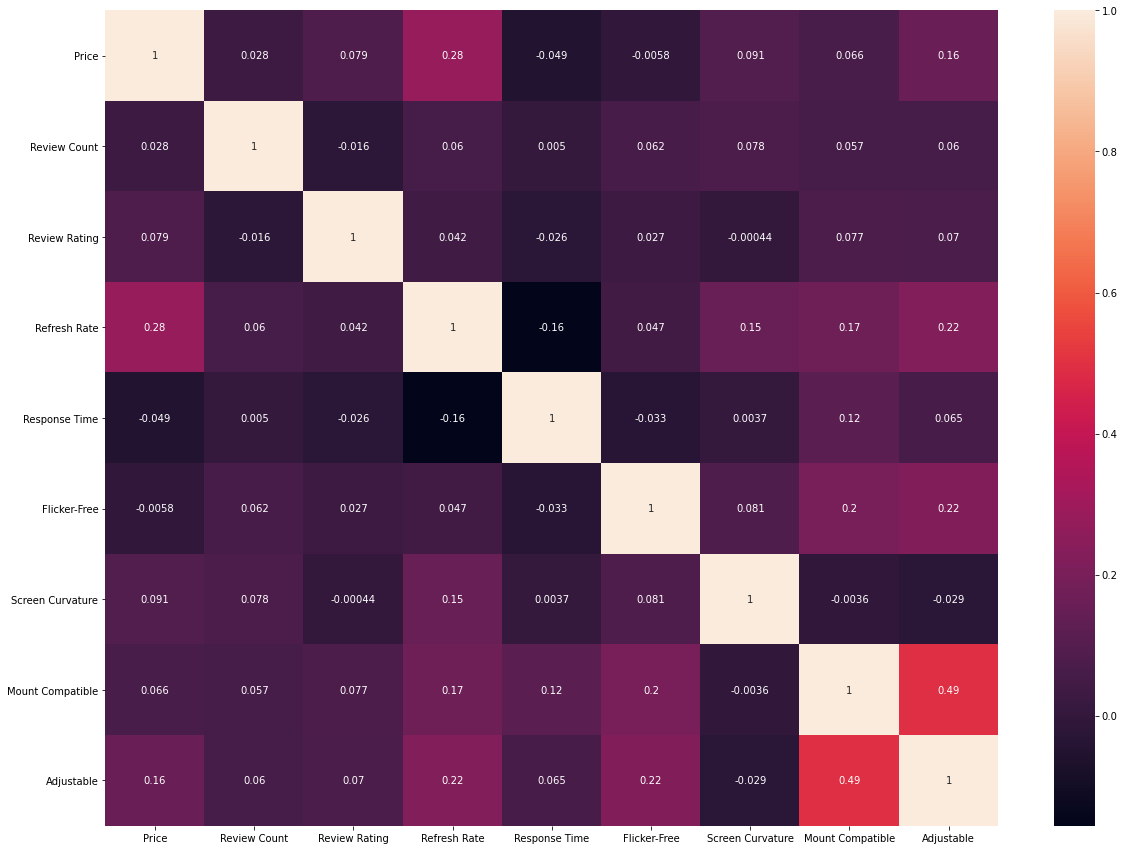

In [266]:
#Create a correlation matrix

correlation_mat = draft_data.corr()
correlation_mat
plt.figure(figsize=(20,15))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [267]:
# Look at the coprrelations for the price

price_corr = pd.DataFrame(correlation_mat['Price']).sort_values(by = 'Price', ascending = 0)
price_corr

,Price
Price,1.000000
Refresh Rate,0.277820
Adjustable,0.159720
Screen Curvature,0.090705
Review Rating,0.078992
Mount Compatible,0.065907
Review Count,0.027568
Flicker-Free,-0.005840
Response Time,-0.049189


In [269]:
#Look at the correlations to review_rating

review_rating_corr = pd.DataFrame(correlation_mat['Review Rating']).sort_values(by = 'Review Rating', ascending = 0)
review_rating_corr

,Review Rating
Review Rating,1.000000
Price,0.078992
Mount Compatible,0.076995
Adjustable,0.069703
Refresh Rate,0.041524
Flicker-Free,0.027388
Screen Curvature,-0.000443
Review Count,-0.016345
Response Time,-0.025752


276.9189990089189
197.3017401748017


count    1009.000000
mean      276.918999
std       197.399584
min        39.990000
25%       129.990000
50%       210.260000
75%       366.570000
max       999.990000
Name: Price, dtype: float64

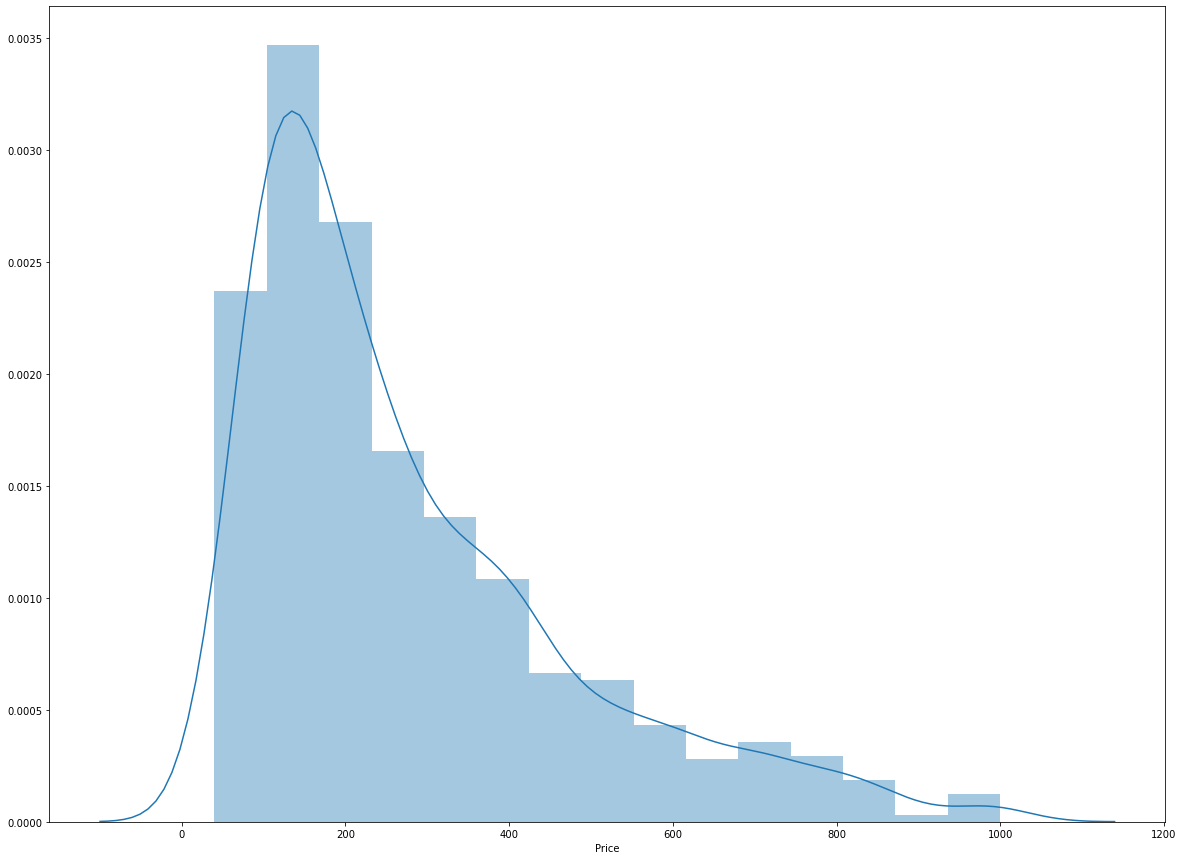

In [280]:
#Look at the distribution of price and some summary statistics

plt.figure(figsize=(20,15))
sns.distplot(draft_data.Price, bins = 15)
print(np.mean(draft_data.Price))
print(np.std(draft_data.Price))
draft_data.Price.describe()

In [311]:
#Look at the highest priced monitors in the data

top_price = draft_data[draft_data.Price > 800.00].sort_values(by = 'Price', ascending = 0)
top_price

,Product Name,Price,Review Count,Review Rating,Resolution,Refresh Rate,Response Time,Flicker-Free,Screen Curvature,Mount Compatible,Adjustable
524,"ViewSonic VP3881 38"" WQHD+ 3840 x 1600 7ms (GT...",999.99,1.0,5.0,"[3840, 1600]",0.0,7.0,0,0,1,1
698,"Alienware AW2518H 25"" NVIDIA G-Sync Gaming Mon...",999.00,11.0,4.0,NaN,0.0,1.0,0,0,0,1
805,"LG 38UC99-W 38"" Class 21:9 3840 x 1600 UltraWi...",996.99,2.0,5.0,NaN,0.0,1.0,0,0,0,0
440,"ASUS ProArt PA34VC 34"" Curved Monitor UWQHD 10...",989.99,2.0,5.0,NaN,100.0,0.0,0,0,0,0
321,"Apple 27"" Thunderbolt Display - Grade B - MC91...",989.00,1.0,4.0,NaN,0.0,0.0,0,0,0,0
926,"MSI Prestige PS341WU 34"" 5120 x 2160 5K Resolu...",979.94,3.0,4.0,"[5120, 2160]",60.0,8.0,0,0,1,0
455,"Dell U3818DW 38"" (Actual size 37.5"") 3840 x 16...",969.99,71.0,4.0,"[3840, 1600]",60.0,5.0,0,1,0,0
921,"Acer Nitro XV273K 27"" Black UHD (3840x2160) IP...",964.22,3.0,4.0,NaN,144.0,1.0,0,0,0,0
762,"Acer EI491CR Pbmiiipx 49"" Black Ultrawide 1800...",899.00,3.0,4.0,NaN,144.0,4.0,0,0,0,0
852,"LG 32UD99-W Black 32"" 4K HDR10 IPS Widescreen ...",896.99,5.0,3.0,NaN,0.0,5.0,0,0,0,1


count    1005.000000
mean       22.438806
std        64.344608
min         1.000000
25%         1.000000
50%         4.000000
75%        15.000000
max       966.000000
Name: Review Count, dtype: float64

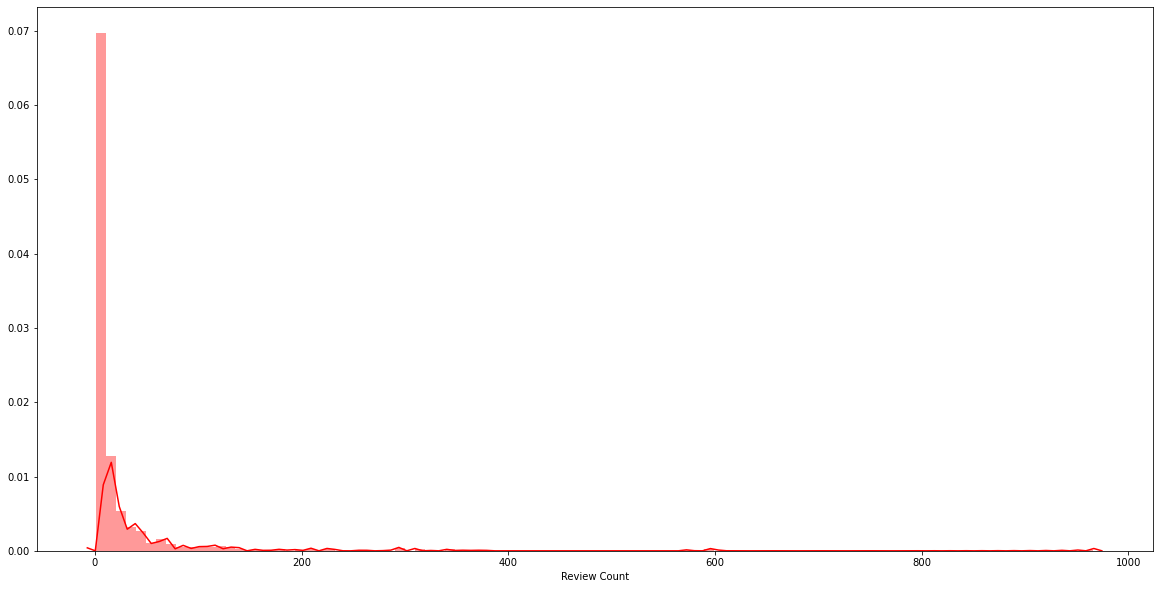

In [345]:
#Look at the review count distribution

plt.figure(figsize=(20,10))
sns.distplot(draft_data['Review Count'], bins = 100, color = 'r')
draft_data['Review Count'].describe()

In [335]:
#Look at the monitors with the most reviews

draft_data[draft_data['Review Count'] > 400.00].sort_values(by = 'Review Count', ascending = 0)

,Product Name,Price,Review Count,Review Rating,Resolution,Refresh Rate,Response Time,Flicker-Free,Screen Curvature,Mount Compatible,Adjustable,Manufacturer
368,"ASUS VS Series VS247H-P 24"" (Actual size 23.6""...",120.99,966.0,4.0,NaN,60.0,2.0,0,0,1,1,"ASUS VS Series VS247H-P 24"" (Actual size 23.6""..."
109,"ASUS VN279QL 27"" Full HD 1920 x 1080 5ms (GTG)...",209.00,598.0,4.0,NaN,0.0,5.0,1,0,0,0,"ASUS VN279QL 27"" Full HD 1920 x 1080 5ms (GTG)..."
679,"ASUS VN248H-P 24"" (Actual size 23.8"") Full HD ...",394.99,598.0,4.0,"[1920, 1080]",0.0,5.0,0,0,1,1,"ASUS VN248H-P 24"" (Actual size 23.8"") Full HD ..."
681,"ASUS VN279Q 27"" 1920 x 1080 5ms (GTG) D-Sub, H...",273.85,598.0,4.0,NaN,0.0,5.0,0,0,0,0,"ASUS VN279Q 27"" 1920 x 1080 5ms (GTG) D-Sub, H..."
662,"ASUS ROG Swift PG279Q Black 27"" 165Hz 2560 x 1...",NaN,573.0,4.0,NaN,165.0,4.0,0,0,0,0,"ASUS ROG Swift PG279Q Black 27"" 165Hz 2560 x 1..."


count    1015.000000
mean        4.108374
std         0.970003
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Review Rating, dtype: float64

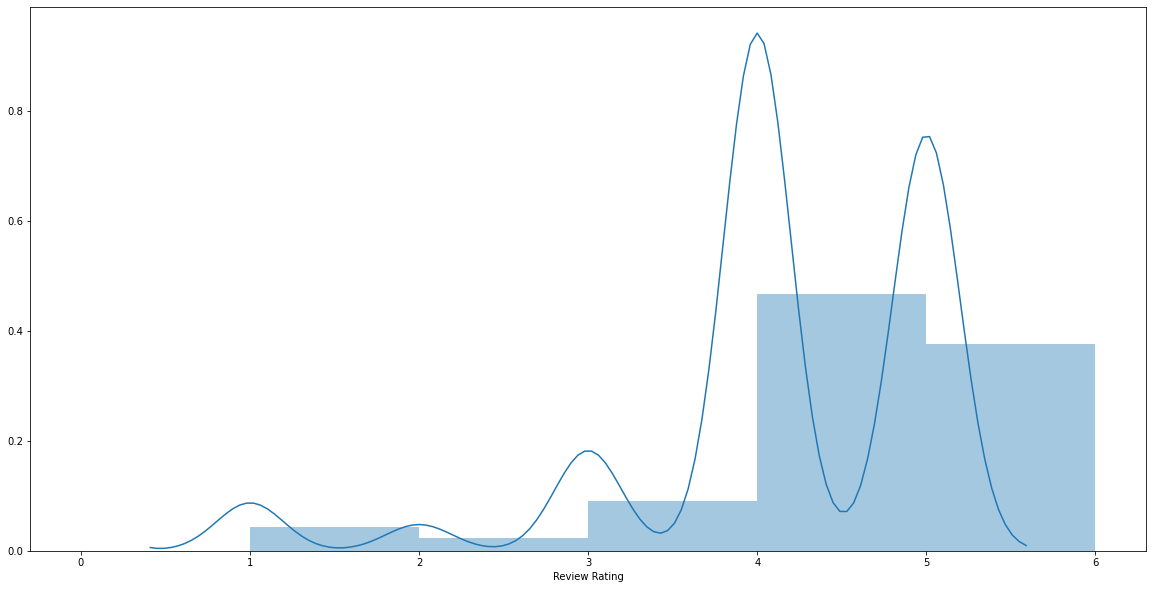

In [373]:
#distribution of review rating

plt.figure(figsize=(20,10))
sns.distplot(draft_data['Review Rating'], bins = [0,1,2,3,4,5,6])
draft_data['Review Rating'].describe()

In [353]:
#most reviews with a 5-star rating

draft_data[(draft_data['Review Rating'] > 4) & (draft_data['Review Count'] > 40)].sort_values(by = 'Review Count', ascending = 0)

,Product Name,Price,Review Count,Review Rating,Resolution,Refresh Rate,Response Time,Flicker-Free,Screen Curvature,Mount Compatible,Adjustable,Manufacturer
112,"MSI Optix G27C4 27"" Full HD 1920 x 1080 1ms (M...",229.99,94.0,5.0,NaN,165.0,1.0,0,0,0,0,"MSI Optix G27C4 27"" Full HD 1920 x 1080 1ms (M..."
139,"ASUS VP249HE 24"" (Actual size 23.8"") Full HD 1...",129.99,84.0,5.0,"[1920, 1080]",75.0,5.0,1,0,1,1,"ASUS VP249HE 24"" (Actual size 23.8"") Full HD 1..."
93,"GIGABYTE G27F 27"" 144Hz 1080P Gaming Monitor, ...",219.99,82.0,5.0,NaN,144.0,1.0,1,0,1,0,"GIGABYTE G27F 27"" 144Hz 1080P Gaming Monitor, ..."
129,"Asus VA24EHE 23.8"" 1920 x 1080 Full HD LED LCD...",109.99,69.0,5.0,"[1920, 1080]",75.0,5.0,1,0,1,1,"Asus VA24EHE 23.8"" 1920 x 1080 Full HD LED LCD..."
365,"BenQ GW2480 24"" Full HD 1920 x 1080 60Hz 5ms V...",119.99,67.0,5.0,"[1920, 1080]",60.0,5.0,1,0,1,1,"BenQ GW2480 24"" Full HD 1920 x 1080 60Hz 5ms V..."
366,"BenQ GW2283 22"" (Diagonal 21.5"") Full HD 1920 ...",99.99,67.0,5.0,"[1920, 1080]",60.0,5.0,0,0,1,0,"BenQ GW2283 22"" (Diagonal 21.5"") Full HD 1920 ..."
683,"BenQ GW2780 27"" Full HD 1920 x 1080 5ms 60Hz V...",179.00,67.0,5.0,"[1920, 1080]",60.0,5.0,1,0,1,1,"BenQ GW2780 27"" Full HD 1920 x 1080 5ms 60Hz V..."
79,"LG 24GL65B-B 24"" Full HD 1920 x 1080 144Hz 1ms...",199.99,45.0,5.0,"[1920, 1080]",144.0,1.0,0,0,0,1,"LG 24GL65B-B 24"" Full HD 1920 x 1080 144Hz 1ms..."
579,"LG 32UD59-B 32"" Ultra HD 3840 x 2160 4K 2xHDMI...",349.99,44.0,5.0,"[3840, 2160]",0.0,5.0,0,0,1,1,"LG 32UD59-B 32"" Ultra HD 3840 x 2160 4K 2xHDMI..."
37,"Acer KG241Q Sbiip UM.UX1AA.S02 24"" (Actual siz...",169.99,43.0,5.0,NaN,144.0,1.0,0,0,0,0,"Acer KG241Q Sbiip UM.UX1AA.S02 24"" (Actual siz..."


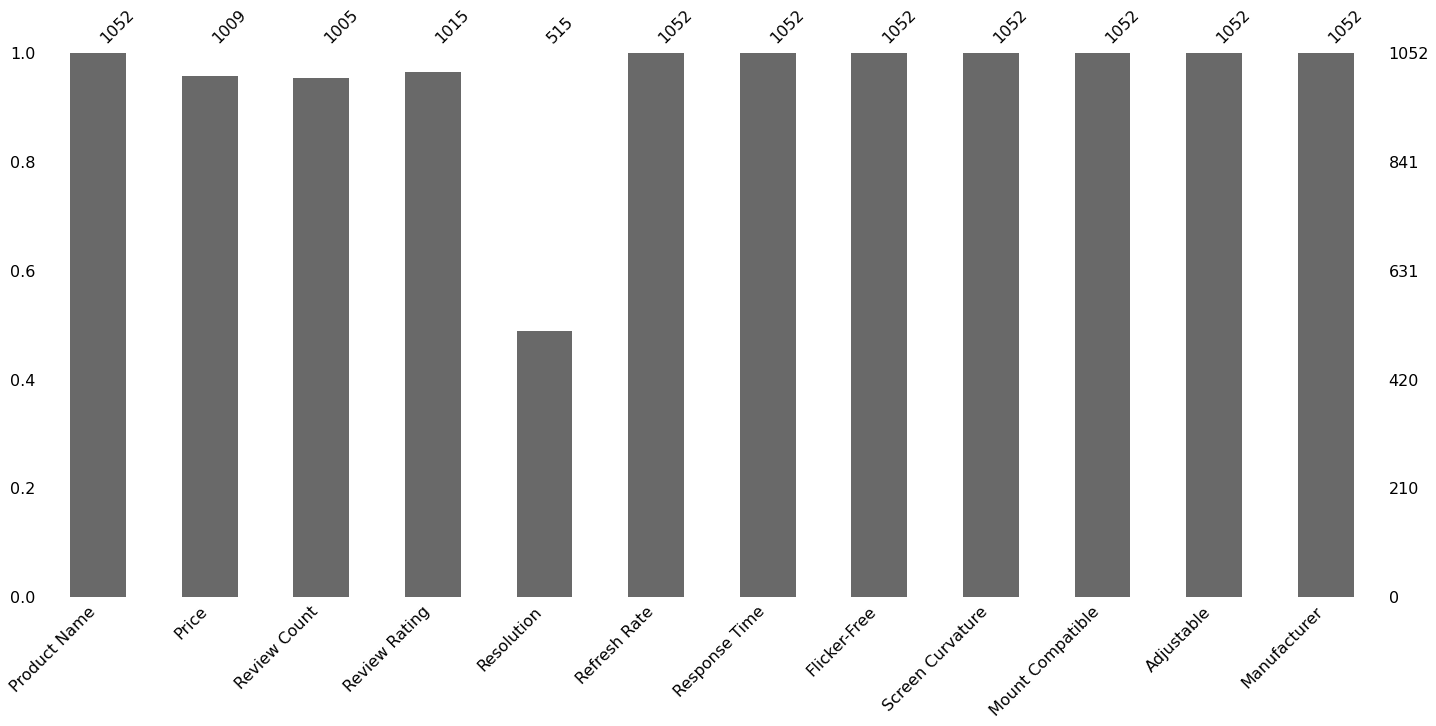

In [377]:
#visualize missing data

plt.figure(figsize=(20,1))
msno.bar(draft_data)

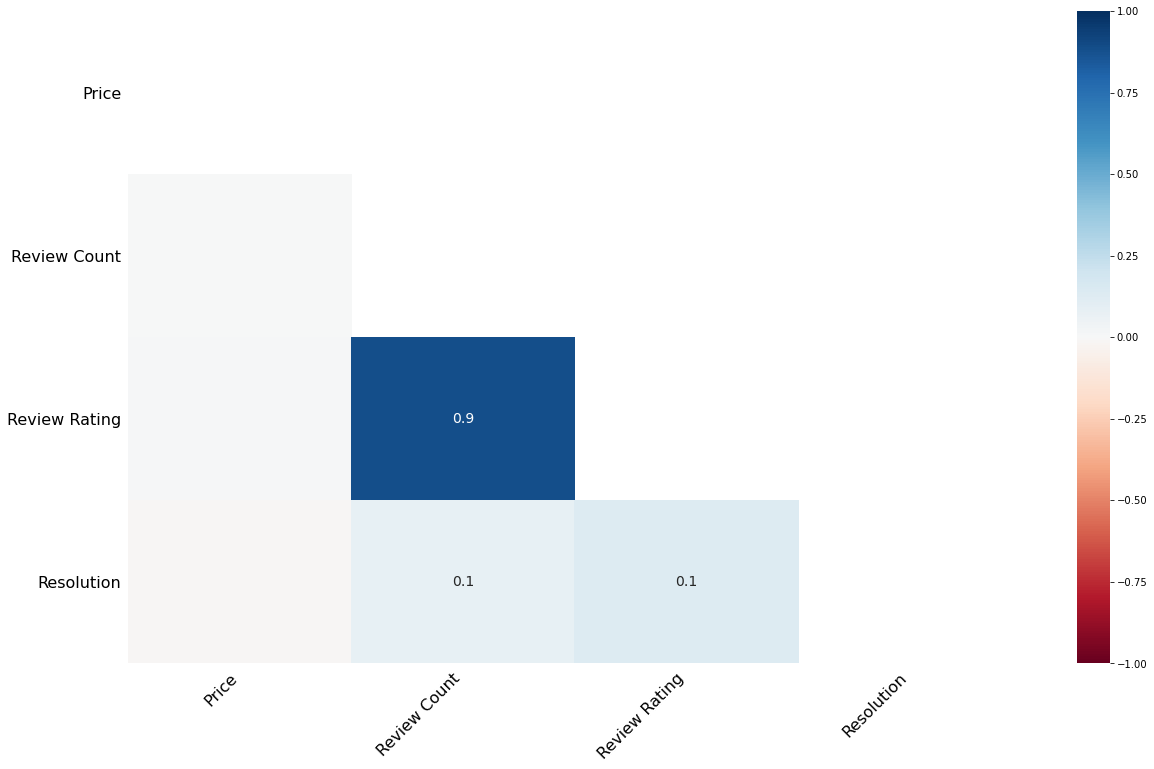

In [289]:
#correlation of missing data

msno.heatmap(draft_data)

In [334]:
#trying to extract the manufacturer from the product name to do data anlysis from the perspective of the manufacturer

#Manufacturer = list(map(lambda x: x = x.replace('^([^\s]+)(\s)(.*)', '\1'), draft_data['Product Name'])) 
#Manufacturer[:10]
draft_data.loc[:,'Manufacturer'] = draft_data.loc[:,'Product Name'].replace('^([^\s]*)(\s)(.*)', '\1')
draft_data.loc[:,'Manufacturer'][:20]

C:\AnacondaFolder2\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0     BenQ GL2780 27" Full HD 1920 x 1080 75Hz 1ms V...
1     ViewSonic ELITE XG270QG 27" Quad HD 2560 x 144...
2     ASUS VG275Q Black 27" Full HD 1920 x 1080 75Hz...
3     BenQ GL2480 24" Full HD 1920 x 1080 1ms (GTG) ...
4     Acer EI272UR Pbmiiipx 27" WQHD 2560 x 1440 144...
5     ASUS VS Series VS228H-P 22" (21.5" Diagonal) F...
6     HP 32f Ultra Slim LED IPS LCD 31.5" 1080p Moni...
7     ASUS VP248QGL 24" Full HD 1920 x 1080 1ms DP H...
8     Acer R Series R271 bid Black 27" IPS 4ms (GTG)...
9     ASUS VP228HE 22" (21.5" Diagonal) Full HD 1920...
10    Acer XG270HU omidpx 27" 2K 2560 x 1440 1ms 144...
11    Acer KA272U biipx UM.HX2AA.004 27" QHD 2560 x ...
12    ASUS VZ279H Frameless 27" 5ms (GTG) IPS Widesc...
13    ASUS VZ27VQ 27" 1920 x 1080 5ms (Gray to Gray)...
14    Fullcom Tech 15.6" WXGA HD eDP 30pin Glossy LE...
15    Fullcom Tech 15.6" Full-HD 1920x1080 Laptop LE...
16    ViewSonic VA2855SMH 28" Full HD 1080P SuperCle...
17    AOC I2267FW 22-Inch Class IPS Frameless/Sl